<a href="https://colab.research.google.com/github/poudelef/Predicting-insurance-Medical-Care-Personal-Dataset-/blob/main/Code_Insurance%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Medical Cost Personal Datasets

Link for the data: https://github.com/stedy/Machine-Learning-with-R-datasets

WE will use insurance.csv data set

In [79]:
# Importing
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [81]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [82]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [83]:
X = insurance_one_hot.drop(['charges'], axis = 1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [84]:
y = insurance_one_hot['charges']
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.2)

In [86]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [87]:
tf.random.set_seed =42
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 10292.6133 - mae: 10292.6133
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7780.8359 - mae: 7780.8359
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7371.0205 - mae: 7371.0205
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7658.6753 - mae: 7658.6753
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7602.7363 - mae: 7602.7363
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7351.8945 - mae: 7351.8945
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7591.5430 - mae: 7591.5430
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7349.7168 - mae: 7349.7168
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7599.2583 - mae: 7599.2583
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7495.7871 - mae: 7495.7871
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7739.7588 - mae: 7739.7588
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [88]:
model_1.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8102.0142 - mae: 8102.0142


[8075.0673828125, 8075.0673828125]

In [89]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 13280.6465 - mae: 13280.6465
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13163.0166 - mae: 13163.0166
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12926.7158 - mae: 12926.7158
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12427.4131 - mae: 12427.4131
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11503.6523 - mae: 11503.6523
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10130.8584 - mae: 10130.8584
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8647.3496 - mae: 8647.3496
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7623.4077 - mae: 7623.4077
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7391.4697 - mae: 7391.4697
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7357.3579 - mae: 7357.3579
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7336.8213 - mae: 7336.8213
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━

In [90]:
model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5192.4922 - mae: 5192.4922


[5033.048828125, 5033.048828125]

In [91]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1),
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

model_3.fit(X_train, y_train,epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 13290.4551 - mae: 13290.4551
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13253.7822 - mae: 13253.7822
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13196.1592 - mae: 13196.1592
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13077.1904 - mae: 13077.1904
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12872.0488 - mae: 12872.0488
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12558.0352 - mae: 12558.0352
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12104.1719 - mae: 12104.1719
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11489.9082 - mae: 11489.9082
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10728.4316 - mae: 10728.4316
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9902.3877 - mae: 9902.3877
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9079.9951 - mae: 9079.9951
Epoch 12/100
34/34 ━━━━━━━━━━━━━━

In [92]:

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1),
])

model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model_4.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 13291.2959 - mae: 13291.2959
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13217.0273 - mae: 13217.0273
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12992.6592 - mae: 12992.6592
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12392.7744 - mae: 12392.7744
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11167.1504 - mae: 11167.1504
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9412.6641 - mae: 9412.6641
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7873.3555 - mae: 7873.3555
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7419.0645 - mae: 7419.0645
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7380.7354 - mae: 7380.7354
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7356.5259 - mae: 7356.5259
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7331.5371 - mae: 7331.5371
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [93]:
# Evaluate the model
model_4.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2303.8264 - mae: 2303.8264


[2381.672607421875, 2381.672607421875]

In [94]:
model_4.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2303.8264 - mae: 2303.8264 


[2381.672607421875, 2381.672607421875]

Text(0.5, 0, 'epochs')

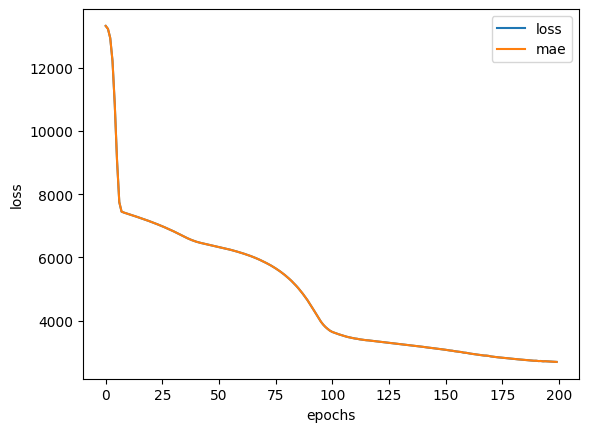

In [95]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### Processing data(Normalizaton and Standardization)

In [96]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [98]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(),['age','bmi','children']),
    (OneHotEncoder(),['sex','smoker','region'])
)

In [99]:
X = insurance.drop('charges', axis = 1)
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [100]:
y = insurance['charges']
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [102]:
# Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [103]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [104]:
X_train_normal[0]

array([ 0.47222651, -1.75652513,  0.73433626,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

In [114]:
tf.random.set_seed = 42
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ['mae'],
)

model_1.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 7555.8672 - mae: 7555.8672
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3117.1958 - mae: 3117.1958
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2971.3755 - mae: 2971.3755
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3384.6772 - mae: 3384.6772
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3852.5049 - mae: 3852.5049
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2992.9312 - mae: 2992.9312
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4077.2329 - mae: 4077.2329
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3283.0032 - mae: 3283.0032
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2570.9700 - mae: 2570.9700
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3058.7778 - mae: 3058.7778
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2496.3132 - mae: 2496.3132
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [115]:
model_1.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1740.5004 - mae: 1740.5004


[1770.26904296875, 1770.26904296875]

In [120]:
tf.random.set_seed = 42
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ['mae'],
)

model_2.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8604.1885 - mae: 8604.1885
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5198.6567 - mae: 5198.6567
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4550.4282 - mae: 4550.4282
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4586.4146 - mae: 4586.4146
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3120.7507 - mae: 3120.7507
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2346.8652 - mae: 2346.8652
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2794.3115 - mae: 2794.3115
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3151.7075 - mae: 3151.7075
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2683.0679 - mae: 2683.0679
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2576.3396 - mae: 2576.3396
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2797.7571 - mae: 2797.7571
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [122]:
model_2.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1448.9720 - mae: 1448.9720


[1501.6334228515625, 1501.6334228515625]

In [134]:
tf.random.set_seed = 42
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ['mae'],
)

model_3.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8629.3174 - mae: 8629.3174
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3367.2598 - mae: 3367.2598
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3697.2104 - mae: 3697.2104
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2887.6489 - mae: 2887.6489
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2571.1709 - mae: 2571.1709
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2863.3953 - mae: 2863.3953
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2838.7637 - mae: 2838.7637
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2549.6301 - mae: 2549.6301
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2593.0676 - mae: 2593.0676
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2650.0000 - mae: 2650.0000
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3130.5295 - mae: 3130.5295
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [135]:
model_3.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1505.7418 - mae: 1505.7418


[1598.9259033203125, 1598.9259033203125]